2025-01-03 13:09:17.682559: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735877357.697569   38553 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735877357.702778   38553 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-03 13:09:17.721913: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading test data...
train_lyric (88, 784)
target name lost_and_cry
exist? ../thirdparty/「波音リツ」歌声データベースVer2/DATABASE/lost_and_cry/lost_and_cry.wav True


I0000 00:00:1735877369.704334   38553 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5564 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1735877373.260784   38753 cuda_dnn.cc:529] Loaded cuDNN version 90600


1/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step

2025-01-03 13:09:33.467744: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 179044352 exceeds 10% of free system memory.
2025-01-03 13:09:33.593525: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 179044352 exceeds 10% of free system memory.


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 515ms/step


2025-01-03 13:09:34.490985: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134283264 exceeds 10% of free system memory.
2025-01-03 13:09:34.607023: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 492371968 exceeds 10% of free system memory.


(128, 10928)
01_first-train-y (128, 10928)


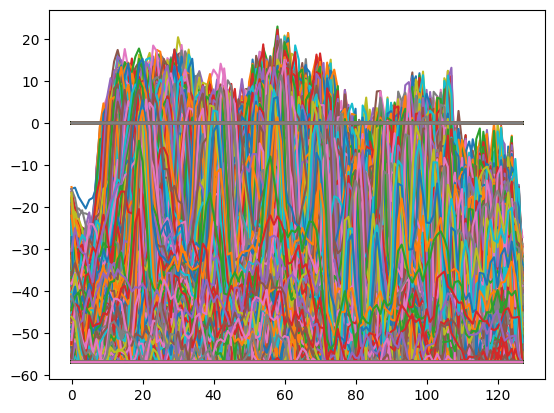

02_first-train-predicted (128, 10928)


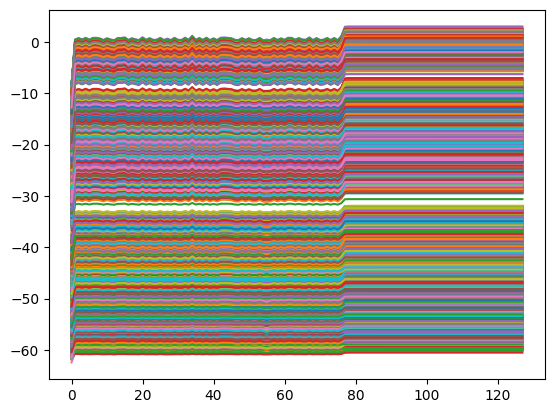

03_target-audio


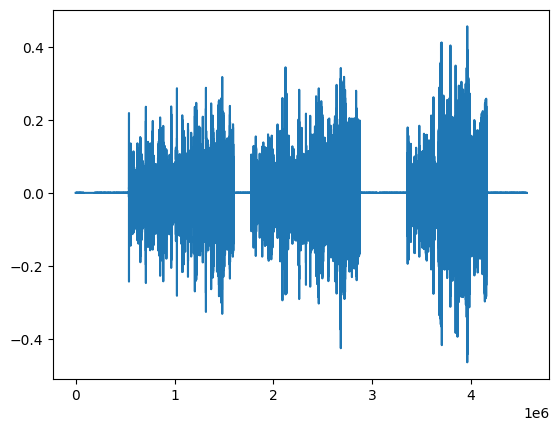

04_target_mel_audio


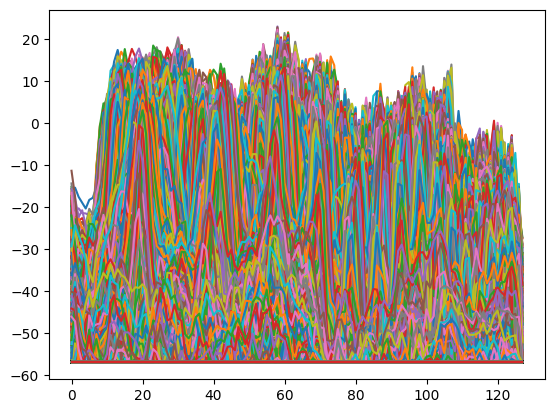

05_vocoder_test


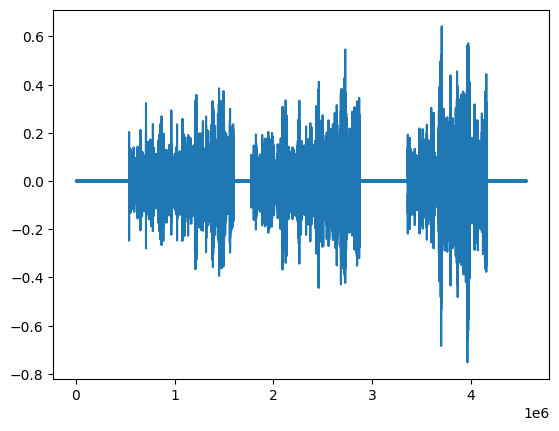

In [1]:
from data_manager import DataManager, DataLoader
from audio_utils import mel_to_audio, save_audio, mel_to_audio, load_audio, audio_to_mel
import numpy as np
import matplotlib.pyplot as plt
import os
import json

if __name__ == "__main__":
    manager = DataManager()
    print("Loading test data...")
    (train_lyric, train_duration, train_notenum), (test_lyric, test_duration, test_notenum), y_train, y_test = manager.get_train_and_test_data()
    print("train_lyric", train_lyric.shape)
    manager.load()
    target_name = manager.names[0]
    print("target name", target_name)
    wav_path = f"../thirdparty/「波音リツ」歌声データベースVer2/DATABASE/{target_name}/{target_name}.wav"
    print("exist?", wav_path, os.path.isfile(wav_path))

    target_audio = load_audio(wav_path)
    

    model = manager.load_model()

    predicted_mel_spectrogram = model.predict([train_lyric, train_duration, train_notenum], batch_size=32)[0]


    with open("../data/json/encode_params.json") as f:
        data = json.load(f)
        max_value = data["max"]
        min_value = data["min"]
        
    train_first_y = y_train[0]
    train_first_y = train_first_y * (max_value - min_value) + min_value
    predicted_mel_spectrogram =  predicted_mel_spectrogram * (max_value - min_value) + min_value
    
    print(predicted_mel_spectrogram.shape)

    
    tag1 = "01_first-train-y"
    print(tag1, train_first_y.shape)
    plt.plot(train_first_y)
    plt.title = tag1
    plt.show()
    audio = mel_to_audio(train_first_y)
    save_audio(tag1 + ".wav", audio)
    
    tag2 = "02_first-train-predicted"
    print(tag2, predicted_mel_spectrogram.shape)
    plt.plot(predicted_mel_spectrogram)
    plt.title = tag2
    plt.show()
    audio = mel_to_audio(predicted_mel_spectrogram)
    save_audio(tag2 + ".wav", audio)

    tag3 = "03_target-audio"
    print(tag3)
    plt.plot(target_audio)
    plt.title = tag3
    plt.show()
    save_audio(tag3 + ".wav", target_audio)

    tag4 = "04_target_mel_audio"
    print(tag4)
    mel_audio = audio_to_mel(target_audio)
    plt.plot(mel_audio)
    plt.title = tag4
    plt.show()

    tag5 = "05_vocoder_test"
    print(tag5)
    audio = audio_to_mel(target_audio)
    audio = mel_to_audio(audio)
    plt.plot(audio)
    plt.title = tag5
    plt.show()
    save_audio(tag5 + ".wav", audio)